# Weather Predictor
We have to predict Temperature on the basis of humidity

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

## Data Insight

In [3]:
WeatherHistory = pd.read_csv("weatherHistory.csv")
WeatherHistory.drop(['Loud Cover','Formatted Date','Precip Type'],axis = 1,inplace = True)

In [4]:
WeatherHistory.head()

,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.


In [5]:
WeatherHistory.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [6]:
WeatherHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Temperature (C)           96453 non-null  float64
 2   Apparent Temperature (C)  96453 non-null  float64
 3   Humidity                  96453 non-null  float64
 4   Wind Speed (km/h)         96453 non-null  float64
 5   Wind Bearing (degrees)    96453 non-null  float64
 6   Visibility (km)           96453 non-null  float64
 7   Pressure (millibars)      96453 non-null  float64
 8   Daily Summary             96453 non-null  object 
dtypes: float64(7), object(2)
memory usage: 6.6+ MB


no missing data

In [7]:
WeatherHistory.columns

Index(['Summary', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [8]:
WeatherHistory['Daily Summary'].value_counts()

Mostly cloudy throughout the day.                                                                                      20085
Partly cloudy throughout the day.                                                                                       9981
Partly cloudy until night.                                                                                              6169
Partly cloudy starting in the morning.                                                                                  5184
Foggy in the morning.                                                                                                   4201
                                                                                                                       ...  
Overcast starting in the morning.                                                                                         24
Breezy starting in the afternoon continuing until night and mostly cloudy starting in the evening.                        24


In [9]:
WeatherHistory['Summary'].value_counts()

Partly Cloudy                          31733
Mostly Cloudy                          28094
Overcast                               16597
Clear                                  10890
Foggy                                   7148
Breezy and Overcast                      528
Breezy and Mostly Cloudy                 516
Breezy and Partly Cloudy                 386
Dry and Partly Cloudy                     86
Windy and Partly Cloudy                   67
Light Rain                                63
Breezy                                    54
Windy and Overcast                        45
Humid and Mostly Cloudy                   40
Drizzle                                   39
Windy and Mostly Cloudy                   35
Breezy and Foggy                          35
Dry                                       34
Humid and Partly Cloudy                   17
Dry and Mostly Cloudy                     14
Rain                                      10
Windy                                      8
Humid and 

In [10]:
correlation = WeatherHistory.corr()

In [11]:
correlation

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,1.000000


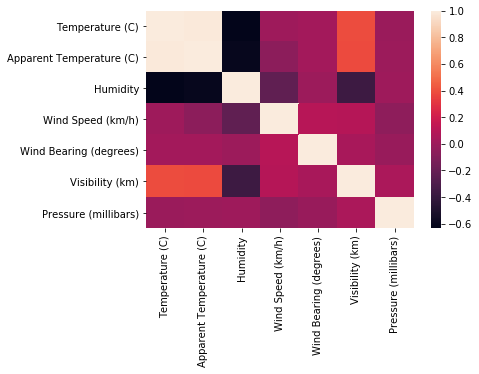

In [12]:
sns.heatmap(correlation)

In [13]:
correlation['Temperature (C)']

Temperature (C)             1.000000
Apparent Temperature (C)    0.992629
Humidity                   -0.632255
Wind Speed (km/h)           0.008957
Wind Bearing (degrees)      0.029988
Visibility (km)             0.392847
Pressure (millibars)       -0.005447
Name: Temperature (C), dtype: float64

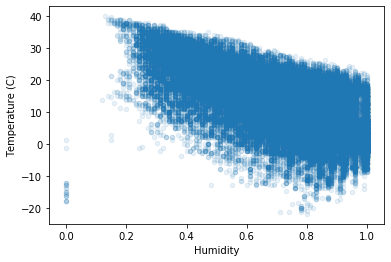

In [14]:
WeatherHistory.plot(kind = 'scatter', x = 'Humidity', y = 'Temperature (C)' , alpha = 0.1)

Inverse Relation between Humidity and Temperature as humidity increases temperature decreases

In [17]:
#splitting test and train data sets
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(WeatherHistory, test_size=0.4, random_state=101)

In [18]:
#Preparing the data
attributes = train_set.drop('Temperature (C)',axis = 1)
labels = train_set['Temperature (C)'].copy()

In [19]:
#numerical value 
attributes_num = attributes[['Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)']]
#categorical value 
attributes_cat = attributes[['Summary','Daily Summary']]

In [20]:
attributes.columns

Index(['Summary', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Daily Summary'],
      dtype='object')

In [21]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
attributes_cat_1hot = cat_encoder.fit_transform(attributes_cat)
attributes_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
#numerical pipelining
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

attributes_num_tr = num_pipeline.fit_transform(attributes_num)

In [23]:
attributes_num_tr

array([[ 0.2835293 , -0.38572219,  0.13605271, -0.1598435 , -0.48089453,
         0.10756251],
       [ 0.30119532,  0.12685046, -0.09216291, -0.2623036 ,  0.90907311,
         0.08756386],
       [ 1.10499888, -1.97469741,  0.05454713,  0.8740721 ,  0.21601445,
         0.06196214],
       ...,
       [ 0.07257633,  1.15199576, -1.56159199, -1.74331785, -0.02655608,
         0.13014719],
       [ 0.80000037, -0.59075125, -0.02230098, -1.2775901 ,  1.37111222,
         0.10161463],
       [-0.5415774 ,  0.9469667 ,  0.01728744, -0.12258528,  0.16210989,
         0.08592604]])

In [24]:
from sklearn.compose import ColumnTransformer

num_attribs = list(attributes_num)
cat_attribs = ['Summary','Daily Summary']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

attributes_prepared = full_pipeline.fit_transform(attributes)

## Training the Model

### Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(attributes_prepared, labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
print(lin_reg.intercept_)

11.86573034754274


In [35]:
#test the model
attributes_test = test_set.drop('Temperature (C)',axis = 1)
labels_test = test_set['Temperature (C)'].copy()
attributes_test_prepared = full_pipeline.fit_transform(attributes_test)

In [36]:
attributes_prepared.shape

(57871, 245)

In [37]:
attributes_test_prepared.shape

(38582, 245)

In [38]:
predictions = lin_reg.predict(attributes_test_prepared)
labels_test.shape

(38582,)

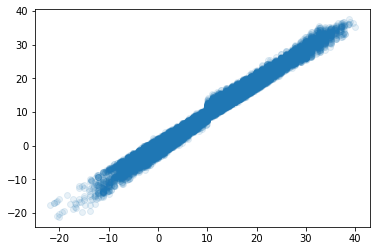

In [39]:
plt.scatter(labels_test,predictions,alpha = 0.1)

In [40]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(labels_test, predictions))
print('MAE:', metrics.mean_absolute_error(labels_test, predictions))
print('MSE:', metrics.mean_squared_error(labels_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(labels_test, predictions)))

Max Error: 5.65947988684562
MAE: 0.8780463275650766
MSE: 1.341621089210202
RMSE: 1.1582836825278175


### Implementing SVR

In [41]:
from sklearn.svm import LinearSVR
svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(attributes_prepared,labels)

C:\Users\muham\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=None, tol=0.0001, verbose=0)

In [42]:
predictions = svm_reg.predict(attributes_test_prepared)

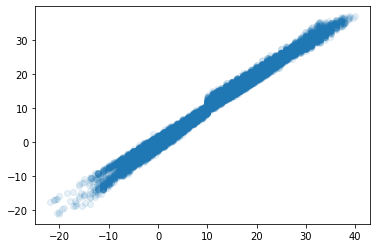

In [43]:
plt.scatter(labels_test,predictions,alpha = 0.1)

In [44]:
from sklearn import metrics
print("Max Error:" , metrics.max_error(labels_test, predictions))
print('MAE:', metrics.mean_absolute_error(labels_test, predictions))
print('MSE:', metrics.mean_squared_error(labels_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(labels_test, predictions)))

Max Error: 4.380090716719183
MAE: 0.800042824517142
MSE: 0.9666990312556601
RMSE: 0.9832085390473682
